# Predicting Forest Cover Types
## Mod 5 - Kaggle Competition - Machine Learning

Next: 
    1) fuse soil categories into stony / drainage
    2) Hydrology (distance to water) / water table
    3) Outliers deal

By Valentina Fontiveros

![](park_photo.png)

### Introduction

This dataset comes from a study conducted in four wilderness areas within the Roosevelt National Forest of northern Colorado. These areas represent forests with very little human disturbances – the existing forest cover types there are more a result of ecological processes rather than forest management practices. The data is in raw form and contains categorical data such as wilderness areas and soil type.

Being able to predict which fauna grows optimally under various environmental conditions would aid in conservation and reforestation efforts.

### Domain Considerations:

Since the training dataset describes various environmental factors associated with each 
cover type, we should consider how to properly process the data to fit with our biological
knowledge.

There are various abiotic factors affecting plant species distribution and growth:

- elevation / temperature      : plant species are very sensitive to elevation / temperature differences 
- water / drainage             : water availability is related to slope, soil composition, and surface water location. 
- sunlight / shade /           : sunlight availability is related to hillshade / aspect
- nutrient availability        : soils have varying levels of organic and inorganic nutrients / magnesium / iron helps



In [1]:
# basic python libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

### Read Data

In [2]:
train = pd.read_csv('train.csv', dtype = 'float')
test = pd.read_csv('test.csv', dtype = 'float')

# Set Record Id As Index
train.Id.astype('int',inplace=True)
test.Id.astype('int',inplace=True)
train.set_index('Id',inplace=True)  
test.set_index('Id',inplace=True)

# suppress warnings 
import warnings
warnings.filterwarnings('ignore')
print('Data is loaded, indexed by ID, and transformed to floating number.')

Data is loaded, indexed by ID, and transformed to floating number.


In [3]:
print('Features included in training dataset: ',len(train.columns))
print('')
print(train.columns)
print('')
print('Are features the same order/wording/length in the test set?: ', list(train.columns[0:-1]) == list(test.columns))

Features included in training dataset:  55

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil

### Summary Statistics

In [4]:
print('Summary statistics for training dataset continuous variables.')
train_stats = train[train.columns[0:10]].describe()
train_stats

Summary statistics for training dataset continuous variables.


Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean      135.091997                         1511.147288  
std        45.895189                         1099.936493  
min         0.000000                            0.000000  
25%       106.000000                          730.000000  
50%       138.000000                         1256.000000  
75%       167.000000                         1988.250000  
max       248.000000                         6993.000000

In [5]:
print('Summary statistics for test dataset continuous variables')
test_stats = test[test.columns[0:10]].describe()

Summary statistics for test dataset continuous variables


In [6]:
print('Calculate Difference in Stats (Test - Train)')
diff_stats = test_stats-train_stats

Calculate Difference in Stats (Test - Train)


Positive values represent higher test set values.
Negative values represent lower test set values
Values near zero show negligible differences between test and train set.

MEAN


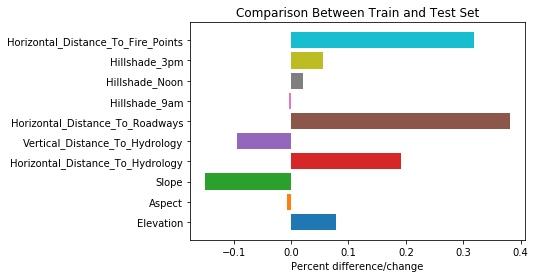


50%


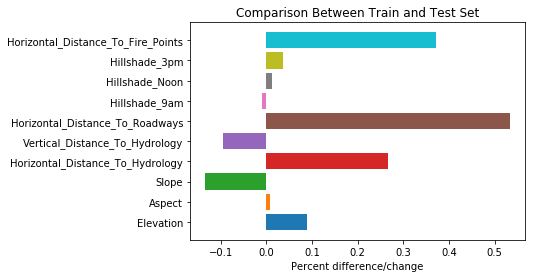


STD


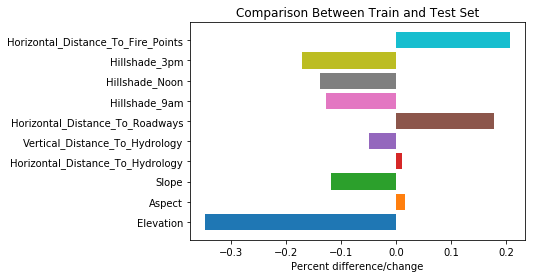

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Positive values represent higher test set values.')
print('Negative values represent lower test set values')
print('Values near zero show negligible differences between test and train set.')

for i in ['mean','50%','std']:
    print('')
    print(i.upper())
    for c in diff_stats:
        plt.barh(c,diff_stats[c][i]/train_stats[c][i])
        plt.title('Comparison Between Train and Test Set')
        plt.xlabel('Percent difference/change')
    plt.show()

There are significant difference between the test set and training sets regarding variability and mean values for various features. As a result, we should expect a significant variation in the target variable distributions.

### Data QC

#### Missing Values

In [8]:
print('Any missing values in training data? ',train.isna().any().any())
print('Any missing values in test data? ', test.isna().any().any())

Any missing values in training data?  False
Any missing values in test data?  False


#### Correlation between variables

In [9]:
continuous_vars = list(train.columns[0:10])
continuous_vars.append("Cover_Type")

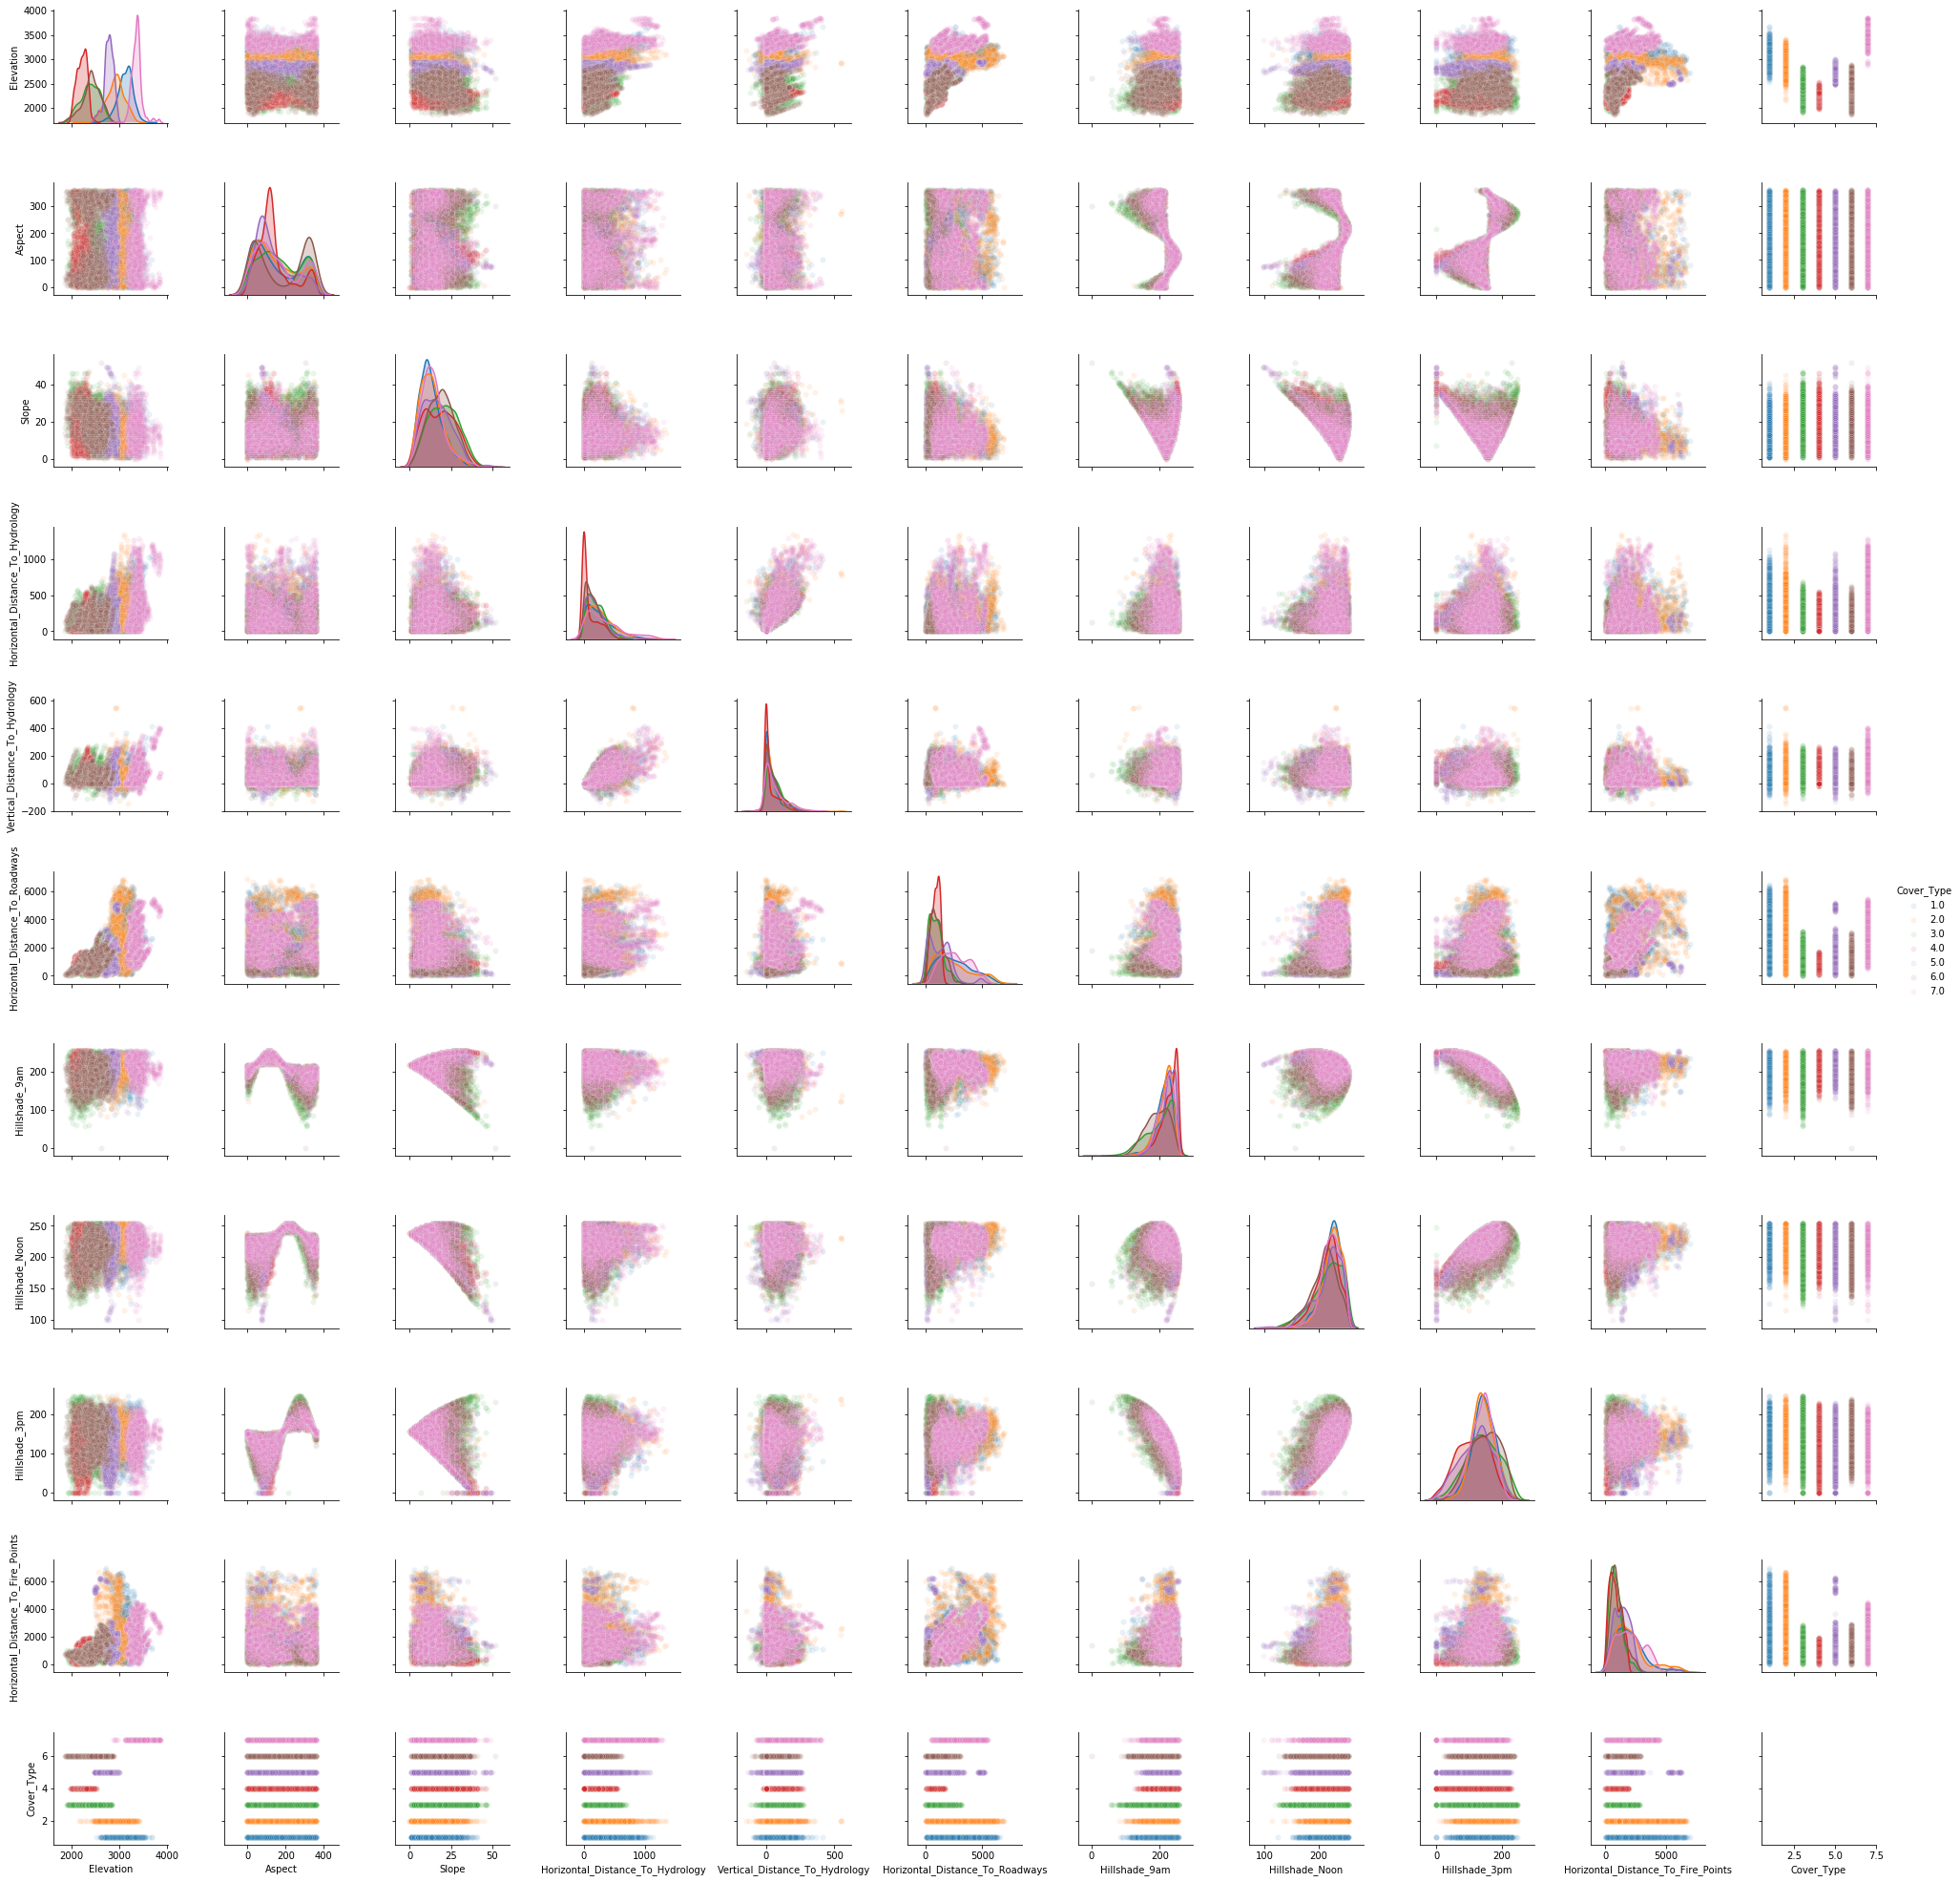

In [200]:
# Generate correlogram
sns.pairplot(train[(continuous_vars)], kind='scatter', hue="Cover_Type", plot_kws= {'alpha': 0.1})
plt.show()

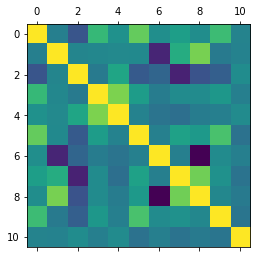

In [10]:
plt.matshow(train[continuous_vars].corr())
plt.show()

#### Elevation - Data Exploration

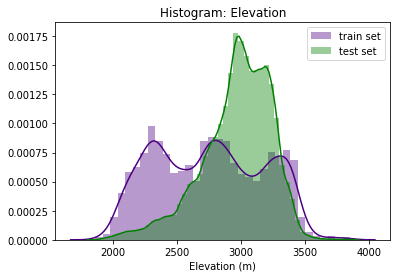

In [11]:
sns.distplot(train.Elevation, label='train set',color='indigo')
sns.distplot(test.Elevation, label='test set', color='green')
plt.title('Histogram: Elevation')
plt.xlabel('Elevation (m)')
plt.legend()
plt.show()

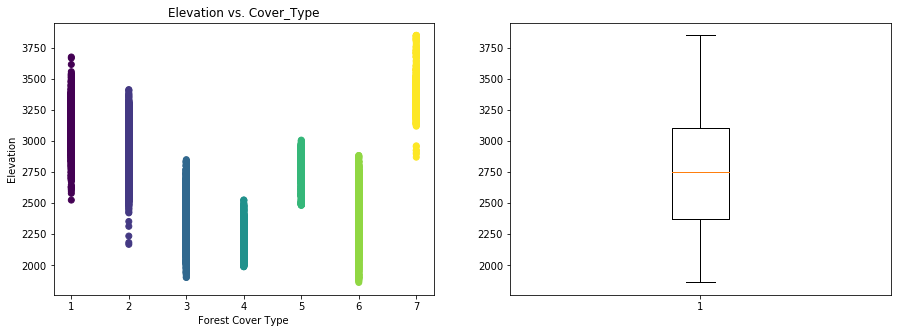

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.scatter(train.Cover_Type, train.Elevation, c=train.Cover_Type)
plt.title('Elevation vs. Cover_Type')
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation')

ax2 = fig.add_subplot(122)
ax2.boxplot(train.Elevation)
plt.show()

# 3D PLOT FOR VISUALIZING ELEVATION VS. COVER TYPE
from matplotlib import animation
fig = plt.figure()
ax = Axes3D(fig)
def init():
    ax.scatter(train.Cover_Type, train.Cover_Type, train.Elevation, c=train.Cover_Type, s=60)
    return fig
def animate(i):
    ax.view_init(elev=500, azim=i*4)
    return fig

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)

fn = 'cover_elevation_&_type'
ani.save(fn+'.htm',writer='ffmpeg',fps=1000/50)
ani.save(fn+'.html',writer='imagemagick',fps=1000/50)

import subprocess
cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
subprocess.check_output(cmd)

plt.rcParams['animation.html'] = 'html5'
ani

#### Aspect - Data Exploration

- Conclusions: Aspect is not relevant to Forest Cover
- Proof below

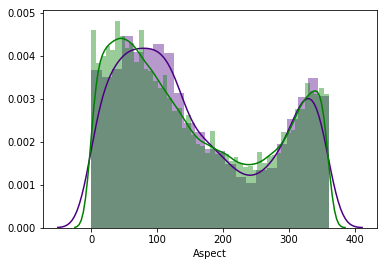

In [13]:
sns.distplot(train.Aspect,color='indigo',label='train')
sns.distplot(test.Aspect,color='green',label='train')

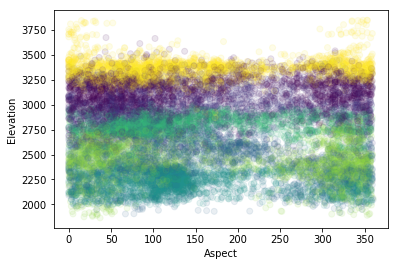

In [14]:
plt.scatter(train.Aspect,train.Elevation, c=train.Cover_Type,alpha=0.1)
plt.xlabel('Aspect'); plt.ylabel('Elevation'); 
plt.show()

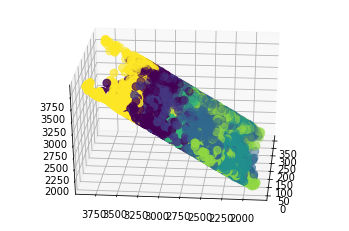

In [15]:
# 3dplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train.Aspect, train.Elevation, train.Elevation, c=train.Cover_Type, s=60)
ax.view_init(30, 185)
plt.show()


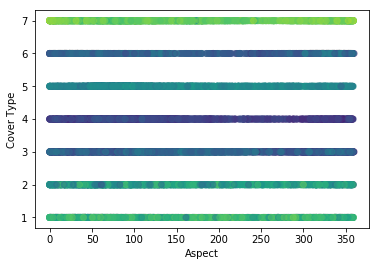

In [16]:
plt.scatter(train.Aspect,train.Cover_Type, c=train.Elevation,alpha=0.5)
plt.xlabel('Aspect'); plt.ylabel('Cover Type'); 
plt.show()

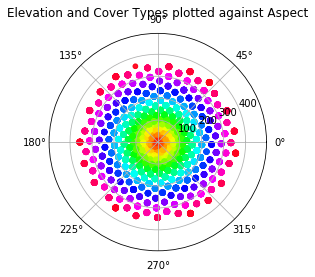

In [17]:
from matplotlib.pyplot import polar

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(train.Aspect, train.Aspect, c=train.Aspect, s=train.Elevation/100, cmap='hsv', alpha=0.75)
ax.set_title('Elevation and Cover Types plotted against Aspect')
plt.show()

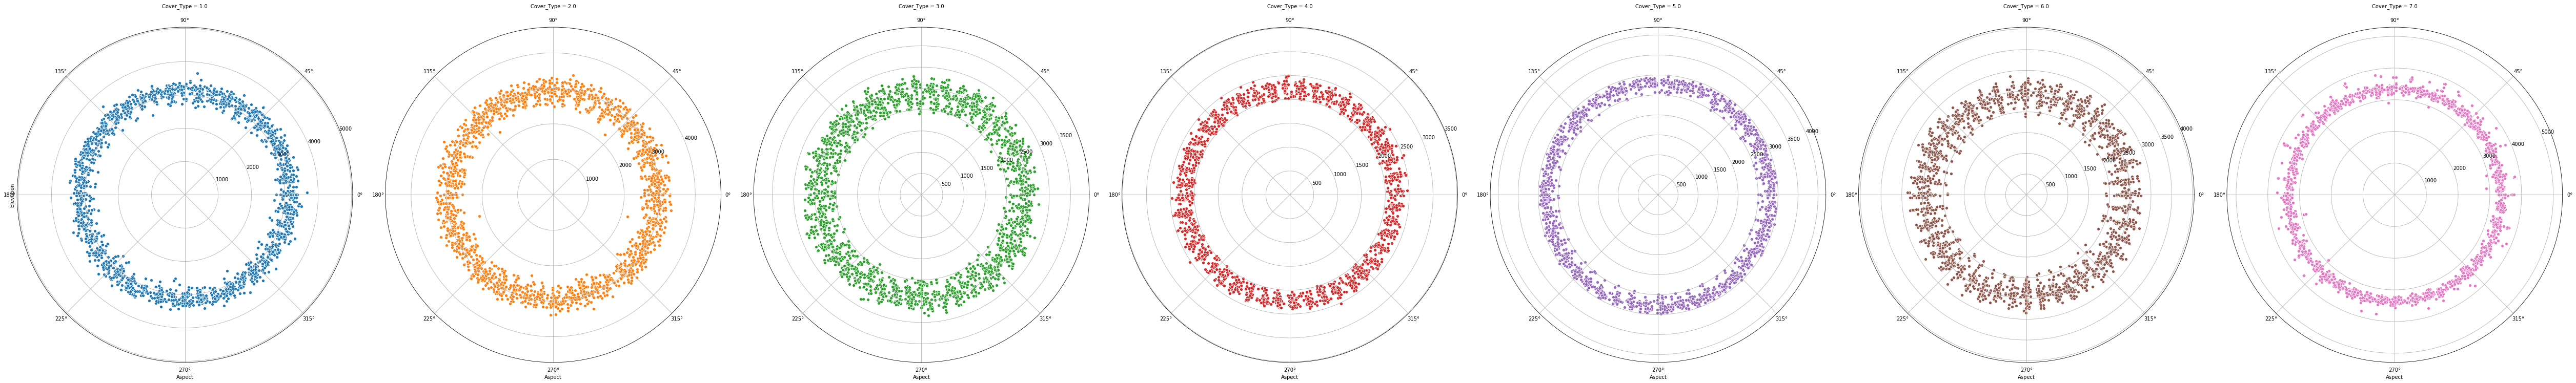

In [18]:
# aspect
g = sns.FacetGrid(train, col="Cover_Type", hue="Cover_Type",
                  subplot_kws=dict(projection='polar'), height=10,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "Aspect", "Elevation")

### Slope

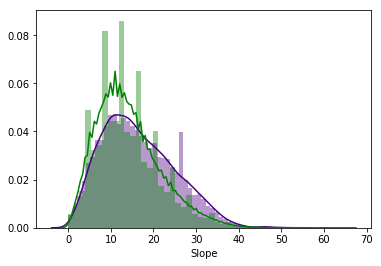

In [19]:
sns.distplot(train.Slope,color='indigo')
sns.distplot(test.Slope,color='green')

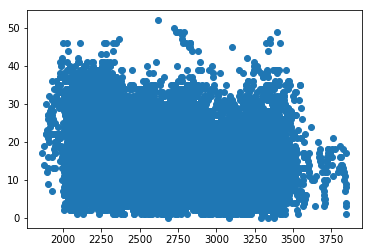

In [20]:
plt.scatter(train.Elevation,train.Slope)

### Horizontal / Vertical Distance to Hydrology - Data Exploration

### Hillshade 9 am, Noon, 3pm

In [145]:
dict_light = {3:train.Hillshade_9am.iloc[0],6:train.Hillshade_Noon.iloc[0],9:train.Hillshade_3pm.iloc[0]}

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = list(dict_light.keys())
y = list(dict_light.values())

def create_polynomial_regression_model(degree,X_train,y_train):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [146]:
create_polynomial_regression_model(2,X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[3 6 9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [111]:
train.Hillshade_9am.iloc[0]

221.0

### Horizontal Distance to Roadways

In [ ]:
print('hi')

In [ ]:
train.

### Horizontal Distance to Fire Points

In [254]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### Preprocessing Steps - Scaling

In [11]:
# create a list of features than don't include target/label
features = train.columns[0:-1]

# Format training features and labels - X: features, y: labels
X = train[features]
y_train = train.Cover_Type # Series of Labels

print('Set index as Id and created feature and labeled dataframe.')


Set index as Id and created feature and labeled dataframe.


In [36]:
# Scaling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Components analysis
from sklearn.decomposition import PCA

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel




In [37]:
# Standardization of Data - substracts mean value and divides by variance. 
# Result is in terms of variance ad us kess affected by outliers. Seems best choice.
scaler = StandardScaler()   
scaler.fit_transform(X)   # Scale data

# A Different scaler may be used, but data has many outliers. Thus first scaler preferred.
#scaler2 = MinMaxScaler
#scaler2.fit_transform(X)

# Scale features
X_train = pd.DataFrame(scaler.transform(X))
X_train.columns = X.columns

print('Scaled data using Standard Scaler.')

Scaled data using Standard Scaler.


### Preprocessing - Feature Selection

#### PCA of soil parameters. Components decided on variety present... weigh
#### by level of stonyness

extremely bouldery 
extremely stony
very stony
rubbly
rock outcrop complex 
stony
rock land complex
till substratum complex
not stony

gothic - deep, well drained soil alluvium slope/fans/landslide
https://soilseries.sc.egov.usda.gov/OSD_Docs/G/GOTHIC.html
    
    
X = X_train[X_train.columns[14:54]]
pca = PCA(n_components = 2)
pca.fit(X)
soil = pca.fit_transform(X)
soil

In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train2 = sel.fit_transform(X_train)

In [ ]:
(X_train2).columns

### Classification Models

In [ ]:
# Models to be used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model evaluation Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 


# A function that calculates and prints model performance metrics

def performance(y_true, y_predict):
    acc = accuracy_score(y_true, y_predict)
    r2 = r2_score(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    # Return the score
    return ['Accuracy: ',acc,'R-squared: ', r2,'Mean Squared Error: ',mse]



### Principal Component Analysis

In [ ]:
#pca = PCA(n_components=7)
#pca.fit(X_train)  

In [ ]:
#X_train_PCA = pd.DataFrame(pca.transform(X_train))

### RandomForest

In [ ]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_train_pred = forest_clf.predict(X_train)
print(performance(y_train,y_train_pred))
forest_clf.feature_importances_
#model = SelectFromModel(forest_clf, prefit=True)
#X_new = model.transform(X_train)
#X_new.shape               

In [ ]:
X_train.Soil_Type39.sum() == X_new[:,10].sum()

In [ ]:
X_new_df = pd.DataFrame(X_new)
X_new_df.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Soil_Type39']

In [ ]:
forest_clf.fit(X_new_df, y_train)
y_train_pred = forest_clf.predict(X_new_df)
print(performance(y_train,y_train_pred))


In [ ]:

#corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']


test.drop(corr_feats,axis=1,inplace=True)

#features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
#       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
#       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#       'Horizontal_Distance_To_Fire_Points','Soil_Type39']

X_test = pd.DataFrame(scaler.transform(test))
X_test.columns = test.columns

#X_test2 = X_test[features]
#X_test2.columns = features

y_test_pred = forest_clf.predict(X_test)
            

data = [test.index, y_test_pred]

forest_submission = pd.DataFrame(data={'Id':test.index.astype('int'),'Cover_Type':y_test_pred.astype('int')})

# output
forest_submission.to_csv('random_forest.csv',index=False)
forest_submission.head()

In [ ]:
# features to be dropped
#corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Hillshade_Noon','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
#train.drop(corr_feats,axis=1,inplace=True)

### K Nearest Neighbors

In [ ]:
def find_best_k(X_train, y_train, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_train)
        f1 = accuracy_score(y_train, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))

In [ ]:
find_best_k(X_train,y_train)

In [ ]:
kclf = KNeighborsClassifier()
kclf.fit(X_train,y_train)
y_train_pred = kclf.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:
#test.set_index('Id',inplace=True) 
corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
test.drop(corr_feats,axis=1,inplace=True)

X_test = pd.DataFrame(scaler.transform(test))
X_test.columns = test.columns

y_test_pred = kclf.predict(X_test)

data = [test.index, y_test_pred]

knearest_submission = pd.DataFrame(data={'Id':test.index.astype('int'),'Cover_Type':y_test_pred.astype('int')})
k_nearest_submission.to_csv('k_nearest.csv',index=False)
knearest_submission.head()

### Decision Trees

In [ ]:
tclf= DecisionTreeClassifier()
tclf.fit(X_train,y_train) 
y_train_pred = tclf.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:
tclf

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:

plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
min_samples_splits = np.arange(2,11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.legend()
plt.show()

### Support Vector Machines

In [ ]:
from sklearn import svm

vclf = svm.SVC()
vclf.fit(X_train, y_train)
y_train_pred = vclf.predict(X_train)
print(performance(y_train,y_train_pred))

### Ensemble Methods XGBoost

In [ ]:
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier()


In [ ]:
clf.fit(X_train, y_train)


In [ ]:
y_train_pred = clf.predict(X_train)
print(performance(y_train,y_train_pred))

### Tuning Classifier

In [ ]:
list(range(100,500,50))

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [3],
    'min_child_weight': [10],
    'subsample': [1],
    'n_estimators': range(100,500,100)
}

In [ ]:


grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
#val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, y_train_pred)
#val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

### Submission Formatting

In [ ]:
submission_df.to_csv('fourth_pass.csv',index=False)

### Credits

This dataset was provided by Jock A. Blackard and Colorado State University.
Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science